# <center><div style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;">Hespress Stories Sentiment Analysis Classification TF-IDF and SVC</div></center>


<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style="font-family: Trebuchet MS; background-color: #39695d; color: white; line-height: 1;">Table of Contents</h3>

</div>


* [1. Introduction](#1)

* [2. Importing Libraries](#2)  

* [3. Loading Data](#3)

* [4. Data Exploration](#4) 

* [5. Data Preprocessing](#5)
      
* [6. Exploratory Data Analysis](#6)
    
* [7. Modeling](#7)

* [8. Final Results](#8)


    


<a id="1"></a>
# Hespress
### Moroccan News/Stories and Comments from Hespress
### In this Project we gonna use the 11 csv files of the Stories only

### About Dataset  > Kaggle Link : [Hespress](https://www.kaggle.com/datasets/tariqmassaoudi/hespress)

* The Arabic NLP scene is still developping, this dataset will help with that!

* I've scraped over 10 000 stories from Hespress with details such as the author, the publishing date, the topic.

* I've also scraped all the comments associated with them which resulted in over 300K comments, this is very interesting for sentimental analysis, understanding the general opinion, and maybe even predicting election results, since with each comment a score by the readers is associated.

<a id="2"></a>
### <font style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;"> :::    Importing Libraries ::: </b></font>

---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; background-color: #39695d;" data-toggle="popover">Go to Table of Contents</a>

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from collections import Counter

import nltk

# nltk.download('punkt') # make sure to uncomment this line
# nltk.download('stopwords') # make sure to uncomment this line

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from pyarabic.araby import strip_tashkeel, normalize_ligature, strip_tatweel

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [2]:
%%html
<style>
.output_wrapper .output {
  overflow-y: visible;
  height: fit-content;
}
</style>

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

<a id="3"></a>
### <font style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;"> :::    Loading Data ::: </b></font>

---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; background-color: #39695d;" data-toggle="popover">Go to Table of Contents</a>

In [3]:
# create an empty list to hold all the dataframes
dfs = []

# get a list of all CSV files in the data directory
data_dir = "data"
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# loop through the CSV files and append each one to the list of dataframes
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# concatenate all the dataframes together into one dataframe
combined_df = pd.concat(dfs)

In [4]:
df = combined_df[['story','topic']].copy()

<a id="4"></a>
### <font style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;"> :::    Data Exploration ::: </b></font>

---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; background-color: #39695d;" data-toggle="popover">Go to Table of Contents</a>

In [5]:
# print a sample of the combined dataframe
df.sample(2)

,story,topic
387,في خطوة تهدف إلى تجاوز التداعيات السلبية التي أثارها قراره القاضي بأن ينوب عضو أو عضوان عن كل فريق في التصويت على مشاريع القوانين في ظل الحجر الصحي، الذي جر عليه اتهامات بخرق الدستور، اعتمد مجلس المستشارين التصويت عن بعد.وشهدت فترة الطوارئ الصحية جدلا كبيرا في البرلمان المغربي بسبب القرارات التي اعتمدها مكتبا مجلسي النواب والمستشارين القاضية بحضور عدد قليل من النواب والمستشارين إلى قبة البرلمان، وذلك ضمن الإجراءات الصحية للتخفيف من خطر انتشار الفيروس في المؤسسة التشريعية.وانطلق الجدل خلال تصويت لجنة المالية والتنمية الاقتصادية بمجلس النواب على مشروع قانون يجيز للحكومة تجاوز سقف التمويلات الخارجية من الاقتراض، حيث نبه البرلماني عن فيدرالية اليسار عمر بلافريج إلى أن عدد المصوتين كان تسعة في مقابل معارضة برلماني واحد، لكن رئيس اللجنة قال إن عدد المصوتين بلغ 43 مقابل معارضة برلماني واحد.وفي سابقة من نوعها، صوت مجلس المستشارين أمس الاثنين على مشروع قانون رقم 30.20 بسن أحكام خاصة تتعلق بعقود الأسفار والمقامات السياحية وعقود النقل الجوي للمسافرين، كما تم التوصل به من مجلس النواب، معتمدا التصويت عن بعد في الجلسة العامة.وباستعمال شاشتين كبيرتين وسط القاعة الكبرى للجلسات، صوت 54 برلمانيا لصالح المشروع الحكومي الذي قدمته وزيرة السياحة نادية فتاح العلوي، في حين لقي مشروع القانون معارضة 6 برلمانيين، دون تسجيل أي امتناع.وسبق لمكتب مجلس المستشارين أن قرر في آخر اجتماع له اعتماد التصويت الإلكتروني عن بعد على النصوص التشريعية الجاهزة، مشددا على أن الهدف هو ضمان مشاركة أوسع للمستشارين في عملية التصويت.ولتعميم التصويت الإلكتروني عن بعد وتأمين إعماله في أحسن الظروف مستقبلا، أكد مكتب المجلس وجوب اتخاذ كل التدابير والإجراءات الإدارية والتقنية اللازمة لتأهيل منظومة الاتصال السمعي البصري والمعلومياتي على مستوى قاعة الجلسات وقاعات اجتماعات اللجان، مشددا على أهمية تطوير تطبيق معلومياتي متقدم يتيح إمكانية التغلب على كل الصعوبات التقنية ذات الصلة.وضمن إجراءات مواجهة جائحة كورونا، اعتمد مجلسا البرلمان في وقت سابق حضور رؤساء الفرق والمجموعات النيابية، أو من ينوب عنهم، بالإضافة إلى عضوين عن كل فريق ومجموعة نيابية.,politique
287,"جمعت الحاجة إلى السير ""نحو وعي بيئي جديد"" مجموعة من الأكاديميين والباحثين المغاربة، في كتاب جماعي جديد صدر عن ""مركز فاطمة الفهرية للأبحاث والدّراسات"".وعُنوِنَ هذا الكتاب الجماعي الصّادر رقميا، بفعل الجائحة بـ: (التربية البيئية وسؤالا التنمية والأخلاق ""نحو وعي بيئي جديد"")، ونسّق أبحاثه الأكاديمي أحمد الفراك.ويتضمّن هذا الكتاب، على سبيل المثال لا الحصر، أبحاثا في فلسفة الأخلاق البيئية، وأهمّ اتجاهات ونظريّات علم اجتماع البيئة، والبعد الأخلاقي في بناء الوعي الحضاري بالبيئة في الفكر الإسلامي، وأخرى تتّخذ من التربية البيئية مدخلا للوعي بالمشترك الإنساني، وأثر التغيّرات المناخية على التنوّع البيولوجي.وشارك في هذا المؤلَّف باحثون هم: جمال الدين ناسك، وربيع الحمداوي، ومحمد شرايمي، ويونس المرابط، وعبد الله الجباري، وأحمد الفراك، ورشيد أمشنوك، ومحمد الفتات، ولبنى السحايمي، وأسماء غيلان، ويونس الخمليشي، ولحسن بلالي ومريم رشيد، وسميرة عيسو، ومصطفى العادل، وأحمد أهلال.ويقول الكتاب في تقديمه إنّه رغم ما للاهتمامات الفكرية القديمة من قيمة عظمى في تركيز النّظر على المعطى الكوني في تكامل عناصره وتفاعلها، وتأثير ذلك على حياة الإنسان وتفكيره؛ إلا أنّ نظرية ""أخلاق الفضيلة"" لأرسطو طاليس، و""أخلاق الواجب"" لكانط، و""أخلاق المنفعة"" لوليام جيمس، لا تنفع في استيعاب مشكلات ""البيئة والإنسان"" المستحدثة في عالمنا المعاصر، ولا في تنمية ""الوعي الكافي"" لإيقاف نزيف هذا الكون جراء استفحال جشع الإنسان وتسلّطه على الطبيعة، وبالتَّبَع على نفسه والأحياء والحياة من حوله.ويذكر الكتاب في تقديمه أنّه ""دون تربية بيئية جذرية ومستدامة، لا يكتفي الوعي الجديد الذي تحمله نداءات فلسفة البيئة المعاصرة والأخلاق التطبيقية بوصف الواقع البئيس وإنشاء خطابات تتحدّث عن الطّموح والآمال والأحلام الجميلة، بلغة متأسّفة وعاجزة عن الإقناع والتّأثير، بل يتجاوز هذا إلى بذل وتنظيم الجهود الجماعية لتحقيق الوعي العالَميّ المشترك بالأزمة التي يستشعرها الإنسان طوعا وكرها"".ثمّ بعد جهد تحقيق الوعي العالمي المشترك بالأزمة، يضيف الكتاب، يُشرَك الجميع دولا ومجتمعات، وأفراد وهيئات، في الشّمال والجنوب، والشّرق والغرب، قصدَ ""إنجاز وعي بيئي جديد وإعداد برنامج الحلّ المشترَك وتنفيذه"".ليذكر بعد ذلك تقديم الكتاب الذي خطّه أحمد الفراك، أستاذ الفلسفة بجامعة عبد المالك السعدي في تطو

In [6]:
df.shape

(11000, 2)

In [7]:
df.isna().sum()

story    0
topic    0
dtype: int64

In [8]:
df.duplicated().sum()

4

In [9]:
# identify duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows

story  \
60                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 جدّد عبد اللطيف الجواهري، والي بنك المغرب، الدعوة إلى اعتماد إجراءات تحفيزية لدعم مشروع الأداء عبر الهاتف النقال، الذي أصبح منظومة جاهزةً منذ مدة، لكن إطلاقه على نطاق واسع لم يتم بعد.وأشار الجواهري، في ندوة صحافية رقمية عقدها الثلاثاء عقب اجتماع مجلس البنك، أن الأداء عبر الهاتف يعتبر من الحلول الأساسية لمحاربة تداول النقد (الكاش) الذي ارتفع منذ بدء الجائحة.وأكد والي بنك المغرب أن اعتماد الأداء عبر الهاتف سيمكن من خفض وقت معالجة العمليات وتكلفتها، كما شدد على أنه مهم من أجل تحقيق الشمول المالي الذي يسعى إليه المغرب.وذكر الوالي أن المغرب حالياً يتوفر على 1.5 محفظة (m-wallet) خاصة للأداء عبر الهاتف، وزاد: "على المستويين التقني والمؤسساتي كل شيء أصبح جاهزاً، لكن على البرلمان أن يُقر إجراءات تحفيزية لتشجيع التجار على الانخراط في هذه المنظومة، لأننا ضيعنا وقتاً طويلاً".واقترح المتحدث اعتماد إجراءات تحفيزية على المستوى الضريبي لتشجيع الانخراط في الأداء عبر الهاتف، وإطلاق عملية تجريبية في إحدى الجهات من أجل الوقوف عليها نتائج العملية وفوائدها.وأكد الجواهري أ

In [10]:
df.drop_duplicates(inplace=True)

art-et-culture        1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
societe               1000
sport                 1000
tamazight             1000
economie               999
orbites                999
politique              999
regions                999
Name: topic, dtype: int64


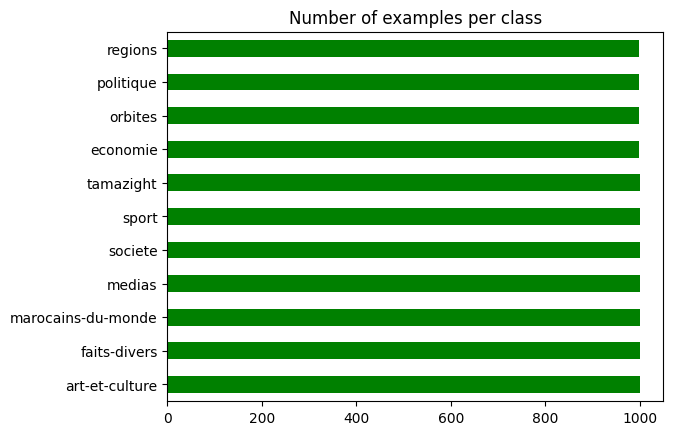

In [11]:
print(df['topic'].value_counts())
df['topic'].value_counts().plot(kind='barh',color='green')
plt.title('Number of examples per class')
plt.show()

In [12]:
# # create a regular expression pattern that matches any non-Arabic letter or non-space character
# non_arabic_pattern = re.compile('[^؀-ۿ\s]+')

# # replace any non-Arabic characters in the "text" column with a space
# df['story'] = df['story'].str.replace(non_arabic_pattern, ' ')

## **<center><span style="color:white;background-color:#000000;border-radius: 5px;padding: 5px; font-size: 18pt">1.Viewing Sample with idx-2 before Data Preprocessing</span></center>**

In [13]:
df.iloc[2]

story    تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للمخرج المغربي هشام العسري إلى جملة من المرجعيات الثقافية والأدبية والأسطورية العالمية التي وظفها.كان يا مكان، امرأة بطلة، (Alice)، تائهة في "بلاد العجائب". عقارب الساعة وهي تدور إلى الخلف، صانع القبعات The mad hatter وهو يحاول، بجشع، بيع ما يظن أنه يصنعه، الكلب Bayard متربص ينتظر فرصة للانقضاض على ضحاياه أو ضحيته. إنها المرأة البطلة التي تمشي بحثًا عن المجهول وكأنها تأخذ كلبها في نزهة، أو أنها في حداد على موته، أو لربما هي ببساطة غاضبة أو مجنونة أو أنها أعقل من العقلاء.في الفيلم القصير – بدون عنف Cruelty free – من تأليف وسيناريو وإخراج هشام العسري، (ضمن ثلاثية أفلام قصيرة هي على التوالي: Android and Zombies، The last Arab Movie، Cruelty Free)، مشاهد تبرز قوة المرأة، (شخصية البطلة "ندى" في الفيلم)، وكيف أنها تستطيع مواصلة السير رغم الألم والابتسام رغم الأحزان. تلتقط الكاميرا مشية أنثوية مُختالة وأنيقة بخطى ثابتة، فالحذاء ذو الكعب العالي يؤلم القدمين لكن المرأة تحافظ على مقاييسها وعلى رأسها مرفوعا ككعب حذائها، كما نظَّرت لذلك كوكو شاني

<a id="5"></a>
### <font style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;"> :::    Data Preprocessing ::: </b></font>

---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; background-color: #39695d;" data-toggle="popover">Go to Table of Contents</a>

In [14]:
# create a regular expression pattern that matches any non-Arabic letter
non_arabic_pattern = re.compile('[^\u0600-\u06FF\s]+')

# replace any non-Arabic letters in the "text" column with an empty string
df['story'] = df['story'].str.replace(non_arabic_pattern, ' ')

In [15]:
# define a translation table that maps each Arabic punctuation mark to a space
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
translation_table = str.maketrans(arabic_punctuations, ' ' * len(arabic_punctuations))

# apply the translation table to the "text" column
df['story'] = df['story'].str.translate(translation_table)

In [16]:
# Replace 2 or more spaces with 1 space
df['story'] = df['story'].replace('\s+', ' ', regex=True)

In [17]:
# define function to normalize arabic text
def normalize_arabic_text(text):
    """
    Normalizes Arabic text by removing diacritics, replacing ligatures with their component letters,
    and removing tatweel characters.
    """
    normalized_text = strip_tashkeel(text)
    normalized_text = normalize_ligature(normalized_text)
    normalized_text = strip_tatweel(normalized_text)
    
    return normalized_text

# define function to remove arabic stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('arabic'))
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

# define function to normalize specific letters
def normalize_letters(text):
  text = re.sub('[ى]', 'ي', text)
  text = re.sub('[إأٱآا]', 'ا', text)
  return text

# def remove_newlines_and_tabs(text):
#     cleaned_text = text.replace('\n', '').replace('\t', '')
#     return cleaned_text

# apply functions to 'story' column in our dataframe
df['story'] = df['story'].apply(normalize_arabic_text)
df['story'] = df['story'].apply(remove_stopwords)
df['story'] = df['story'].apply(normalize_letters)

## **<center><span style="color:white;background-color:#000000;border-radius: 5px;padding: 5px; font-size: 18pt">2.Viewing the same Sample with idx-2 after Data Preprocessing</span></center>**

In [18]:
df.iloc[2]

story    تشير مشاهدة فيلم قصير ضمن الثلاثية الاخيرة للمخرج المغربي هشام العسري جملة المرجعيات الثقافية والادبية والاسطورية العالمية وظفها مكان امراة بطلة تائهة بلاد العجائب عقارب الساعة وهي تدور الخلف صانع القبعات يحاول بجشع بيع يظن انه يصنعه الكلب متربص ينتظر فرصة للانقضاض ضحاياه ضحيته انها المراة البطلة تمشي بحثا المجهول وكانها تاخذ كلبها نزهة انها حداد موته لربما ببساطة غاضبة مجنونة انها اعقل العقلاء الفيلم القصير بدون عنف تاليف وسيناريو واخراج هشام العسري ضمن ثلاثية افلام قصيرة التوالي مشاهد تبرز قوة المراة شخصية البطلة ندي الفيلم وكيف انها تستطيع مواصلة السير رغم الالم والابتسام رغم الاحزان تلتقط الكاميرا مشية انثوية مختالة وانيقة بخطي ثابتة فالحذاء الكعب العالي يؤلم القدمين المراة تحافظ مقاييسها وعلي راسها مرفوعا ككعب حذائها نظرت لذلك كوكو شانيل ذاتها قائلة وفجاة يصبح الجمال جريمة السهل اكتشاف الشعور بالجنون السهل السير طريق الانتقام معان سخيفة وسريالية خفي الفيلم اعظم يشتري الزهور يفكك معاني ضاعت دلالاتها الايام تحمله ثقل عنف وعادات وتقاليد واحكام يكون الاهم واقع المجتمع المغربي

<a id="6"></a>
### <font style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;"> :::    Exploratory Data Analysis ::: </b></font>

---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; background-color: #39695d;" data-toggle="popover">Go to Table of Contents</a>

In [19]:
df.topic.unique().tolist()

['art-et-culture',
 'economie',
 'faits-divers',
 'marocains-du-monde',
 'medias',
 'orbites',
 'politique',
 'regions',
 'societe',
 'sport',
 'tamazight']

In [20]:
# topic encoding
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
encoder = LabelEncoder()

# fit and transform 'topic' column, and add 1 to the encoded labels
df['topic_encoded'] = encoder.fit_transform(df['topic']) + 1
df[['topic','topic_encoded']].sample(10)

,topic,topic_encoded
816,sport,10
92,orbites,6
513,sport,10
785,economie,2
355,sport,10
511,societe,9
109,economie,2
490,societe,9
769,regions,8
18,societe,9


In [21]:
df.head(3)

,story,topic,topic_encoded
0,وجه بيت الشعر المغرب وزير الثقافة والشباب والرياضة رسالة موسومة لماذا تحولت احلام بيضاء كوابيس سوداء اشار خلالها بيت الشعر تاسس سنة بهدف تحقيق جملة الاهداف تروم جميعها تعزيز مكانة الشعر المجتمع والحياة وترسيخ مكانته الناس كحامل لقيم الحلم والخيال الاهداف توطين الشعر المغربي المقررات الدراسية وتشجيع التلاميذ والطلبة قراءته وتذوق جمالياته اللحظة ينتصر لكل مدهش وانساني وجاء الرسالة توصلت هسبريس بنسخة بيت الشعر نجح المغرب خلال مسيرته الطويلة تمتد مدي ربع قرن اقناع المنظمة العالمية للتربية والثقافة والعلوم اليونيسكو باحداث يوم عالمي للشعر طريق المقترح تقدم تبنته الحكومة المغربية عهد الراحل عبد الرحمان اليوسفي نجح ضمان مكانة عالمية لجائزته الشعرية المعروفة الاركانة شعراء العالم يتطلعون للفوز علاوة انتظام منشوراته الشعرية ومجلته الرصينة البيت واستدامة برامجه الشعرية بالتعاون عدد الشركاء امنوا بجدية مشروع مؤسستنا وجودة مستواه فنيا وجماليا واشارت الرسالة ذاتها انه سعيا بيت الشعر المغرب تقديم خدمة جديدة للشعر المغربي بربطه بالفضاء الابداعي العام وخاصة الموسيقي والغنائي واستعادة لحظات طيبة الذكر تعانق شعرنا المغربي عبد الرفيع جواهري وادريس الجاي والخمار الكنوني وحسن المفتي واحمد الطيب لعلج وعلي الحداني اوتار والحان عبد السلام عامر وعبد النبي الجيراري وحسن القدميري تقدم بمشروع فني عنوان احلام بيضاء واوضح بيت الشعر المشروع عبارة مقطوعات غنائية جعلت الشعر المغربي متنا بهدف استعادة ماض جميل اثري خلاله الشعراء المغاربة السجل الشعري للاغنية المغربية فقد منحوها قصائد تحولت خلال اوتار ملحنين مقتدرين اغان تتردد السنة وشفاه الناس المناسبات والافراح والاعراس بعضها سيحظي باهتمام مطربين مشارقة اعادوا اداءها وتسجيلها جديد باصواتهم وورد الرسالة ذاتها انه نجاح يتحق الشعراء كتبوا قصائدهم داخل تجربتهم الانسانية وفي افق الرؤية امتلكوها اللغة والمجتمع والكون وليس الطلب ارغامات سوق الغناء وحسب الرسالة ذاتها فانه لاول مرة تاريخ برنامج الوزارة لدعم الاغنية المغربية تتقدم هياة متخصصة كبيت الشعر المغرب بمشروع رؤية مندمجة تربط الشعر المغربي بافقه الفني يحظي بمساحة اوسع للانتشار عبر الاغنية يصير بمقدور الجمهور المغربي يتعرف شعرائنا المغاربة خلال دواوينهم الشعرية عبر امسياتهم الثقافية خلال الاغنية كلحظة فنية تتجمع وتنصهر عدة ابعاد شعرية ولحنية موسيقية وطربية غنائية وقد سبق للفنانة زيداني جعلت الشعر المغربي افقا لتفكيرها واشتغالها تضيف الرسالة ذاتها عندما قدمت بعضا نصوصه الجميلة للشعراء بوجمعة العوفي وعبد الهادي السعيد خاضت تجربة فنية الشاعر المغربي الكبير عبد الله زريقة بمعية ثلة الشعراء والموسيقيين الاجانب يجعل وجودها ضمن المشروع تثمينا لهذه الارادة تلتقي برغبة بيت الشعر المغرب يكون شعرنا المغربي حاضرا مختلف الحوامل تتيح الذيوع والانتشار مسرح تشكيل اغنية واكد بيت الشعر تشبيك الفنون بينها وتجسير الصلات مكوناتها اهم مخرجات المشروع يجمع شعراء مرموقين بملحنين مقتدرين وموزعين اكفاء وعازفين ماهرين علاوة الحضور الواعي والباذخ للفنانة زيداني انخرطوا المشروع نعيد للكلمة الشعرية بريقها لحظة تعالقها اللحن والموسيقي واختتم بيت الشعر رسالته بالتساؤل لماذا تحولت الاحلام البيضاء كوابيس سوداء ولماذا خيبت اللجنة شكلتموها دعم الاغنية المغربية والارتقاء بمستواها ظنكم وظن الشعب المغربي يمول ماله العام سياسة ثقافية فاشلة وماذا ستفعلون لانصاف بيت الشعر المغرب وتحقيق المساواة وتكافؤ الفرص ينص عليها دستور المملكة وكيف ستردون خلال اجراءات عملية وتدابير ادارية الضجة الفضيحة خلفتها نتائج السنة مجال دعم الاغنية مضيفا اننا نطعن نتائج الدورة برنامج دعم الموسيقي والاغنية واننا ننتظر ستقومون,art-et-culture,1
1,ظل استمرار حالة الطوارئ الصحية المرتبطة بجائحة كورونا اعلن مهرجان الرباط الدولي لسينما المؤلف تنظيم دورته الخامسة والعشرين الفترة الممتدة وتكرم الدورة سيدة المسرح واول وزيرة فنانة تاريخ المغرب المعاصر المرحومة الفنانة ثريا جبران غادرتنا دار البقاء شهر غشت الماضي والتي تركت وراءها تجربة فنية مجال التشخيص تجاوزت حدود المسرح تخوم السينما والتلفزيون وقال المهرجان بيان يجدد اللقاء بمحبي الفن السابع دورته الخامسة والعشرين تصادف السنة اليوبيل الفضي للمهرجان مسار فني حافل بصمت جمعية مهرجان الرباط الدولي للثقافة والفنون موعد قار تنفتح عاصمة المملكة محيطها العربي والافريقي والدولي لتقاسم التجارب الابداعية والتعريف بقيم التسامح والانفتاح والتعايش لطالما ميزت الشعب المغربي وذكر المهرجان انه ظل الظروف الصحية الحالية وعملا بمتطلبات حالة الطوارئ والاجراءات الاحترازية اعلنت عن

In [22]:
shuffled_df = df.sample(frac=1)

In [23]:
shuffled_df.head()

,story,topic,topic_encoded
481,اعددنا نعد استحقاق مغرب كورونا حول السؤال تمحورت وجهة نظر قدمتها مؤسسة محمد عابد الجابري للفكر والثقافة حول رؤيتها لمستقبل المغرب تجاوز ازمة جائحة كورونا خلطت اوراق الدول وارغمتها مراجعة حساباتها ووضع مخططات مستقبلية لوضع جديد سيكون شك مغاير للوضع الحالي ومهدت مؤسسة عابد الجابري لتصورها حول مرحلة كورونا بالاشارة الوضع العام بالمغرب وصول الفيروس المملكة متسما بالتخبط تجلي متاعب اقتصادية حقيقية واحتقان اجتماعي وتراجع مستوي الحقوق والحريات العامة وتخبط سياسي وضياع المستوي الثقافي اضافة اشارت المؤسسة التخبط السياسي ينذر بمخاطر ناجمة تفكيك الحياة السياسية وتمييعها علاوة تتابع الحراكات المنذرة بانفجار يباغت الجميع كانت الافاق تنسد يوما اخر جاء الوباء وخلق جوا جديدا نجمت عنه دينامية جديدة بمنطق اخر واولويات اخري وتساءلت المؤسسة تحمل اسم ابرز رموز الفكر المغرب المعاصر تدخل جائحة كورونا باب رب ضارة نافعة متوقعة يكون الجواب السؤال بالايجاب لوجود مؤشرات دالة برزت الجائحة اجواء التراجعات والاحتقان ميز قبيل كورونا تراجعت عموما لفائدة ذهنية وتقديرات وسلوكات ومشاعر ايجابية اخري مقدمتها سلوكات التضامن الوطني ومشاعر المشاركة الوجدانية المناخ الجديد حتمه الوباء العالمي ساعد تقدم السلوكات والمشاعر الايجابية جهة وتراجع اجواء التوتر جهة ثانية تري مؤسسة عابد الجابري لافتة الاجراءات اتخذتها مؤسسات الدولة كانت نقائصها وتعامل السلطات العمومية جائحة كورونا تنم الشعور بالمسؤولية وعن حد الذكاء واليقظة وادراك اهمية العمل الاستباقي مواجهة الملمات الجو المشوب بالتفاؤل يستبطن سؤالين طرحتهما مؤسسة عابد الجابري الاول يتعلق بمدي الاستعداد لتمثل اهمية العمل الجماعي وفائدة مشاركة القوي الوطنية مواجهة التحديات والثاني يرتبط بالقدرة الانتباه عمق الازمة بلغها المغرب قبيل كورونا وادراك اننا فرصة تبعدنا الخطر بعيد كورونا الطرف المعني بالاجابة الاستفهامين المذكورين المقام الاول الدولة ومؤسساتها المقام الاول فانهما مطروحان القوي الوطنية وفق تصور مؤسسة عابد الجابري مؤكدة الجميع معني بمصير البلد وبمستقبله وان الجميع معني موقعه مؤسسات ونخبا واحزابا سياسية ومنظمات نقابية وجمعيات المجتمع المدني وعموم الشعب وللانتقال الوضعية المغرب تزحف جائحة كورونا العالم وضعية افضل نوهت مؤسسة عابد الجابري يجري يؤكد صحة نظرية كون النموذج التنموي البديل ينبغي يرتكز بالضرورة بناء كتلة تاريخية تتصدي لمهام اعادة بناء الدولة والمجتمع مبرزة الكتلة التاريخية ينبغي تكون نقطة بداية التاسيس للمرحلة الجديدة وذهبت المؤسسة القول الكتلة التاريخية تستطيع تشكل جوابا استثنائيا وضعية استثنائية تعيشها الدولة والمجتمع داعية تتم بلورة جواب الوضعية الاستثنائية الحالية بمقاربة تشاركية تضمن مشاركة الجميع لوضع معالم ومشروع مرحلة كورونا متوقعة يحالف النجاح المسعي صدقت النيات وتوحدت الارادات بناء ديموقراطية حقيقية تجعل الدولة خدمة المجتمع تحقيق الهدف بحسب تصور مؤسسة عايد الجابري ينبغي يبدا خطوة يمكن تكون عربونا لارادة سياسية جادة فتح الافق وهي اقدام الدولة تنقية الاجواء بالاقدام اطلاق سراح المعتقلين السياسيين ومعتقلي الحراكات الشعبية لتمتين الثقة وتعزيز التضامن الوطني تبلور جائحة كورونا,orbites,6
71,اقترب نادي الاهلي المصري حسم صفقة بدر بانون مدافع الرجاء الرياضي فترة الانتقالات المقبلة قطعت المفاوضات الاهلي واللاعب جهة ومع ادارة الفريق الاخضر جهة ثانية اشواطا كبيرة خلال الايام القليلة الماضية وعلمت هسبورت مصادر مطلعة ادارتي الفريقين المصري والمغربي اتفقتا التفاصيل المالية الخاصة بالصفقة لتصير اكتمالها ابرز الانتقالات الدوريين المغربي والمصري سواء ناحية القيمة الرياضية للاعب ناحية المبلغ المالي المنتظر ينعش بشكل كبير خزينة الرجاء تعيش خصاصا فترة طويلة وشجع حسم صفقة مروان الهدهودي المنتظر يلتحق بالفريق الاخضر عقب نهاية الموسم الحالي الدفاع الحسني الجديدي النسور السماح برحيل اعمدتها مرشحا للمغادرة فترة البحث افاق جديدة وتحسين دخله السنوي واكدت المصادر ذاتها المفاوضات الطرفين تجري فترة سرية تامة الفريقين معا يخوضان اخر مباريات الدوريين المغربي والمصري ويحضران لمباريات حارقة لحساب نصف نهائي دوري ابطال افريقيا شان صفقة انتقال بانون الاهلي المصري حال اكتمالها رسميا خلق مزيد الجدل الوسط الرياضي المغربي صارت البطولة الوطنية سوقا للاندية المصرية رحيل محمد اوناجم واشرف بنشرقي وحميد احداد وقت سابق لتقوية الاندية المحلية حساب الاندية المغربية خلال المواجهات تجمع الطرفين المستوي القاري ويعد بانون ابرز اللاعبين انجبتهم البطولة الوطنية السنوات الاخيرة قاد الرجاء التتويج باكثر لقب حمل شارة قيادة المنتخب

In [24]:
# Saving The Processed Data as Checkpoint
shuffled_df.to_csv('hespress_processed.csv', index=False)

In [25]:
# Define a function to get Words count and letters count per example and add 2 new columns
def get_word_and_letter_counts(df, column_name):
    # get word and letter counts
    df['word_count'] = df[column_name].apply(lambda x: len(x.split()))
    df['letter_count'] = df[column_name].apply(lambda x: len(x.replace(' ', '')))

    return df

In [26]:
df = get_word_and_letter_counts(shuffled_df,'story')

In [27]:
df.sample(3)

,story,topic,topic_encoded,word_count,letter_count
640,استدعت الجزائر سفيرها بجمهورية كوت ديفوار للتشاور عقب فتح البلد الافريقي قنصلية مدينة العيون المغربية وقالت وزارة الخارجية الجزائرية اليوم الخميس استدعاء السفير الجزائري ياتي ضد تصريحات مبطنة لوزير الشؤون الخارجية الايفواري واعتبرت الخارجية الجزائرية قنصلية كوت ديفوار بالصحراء المغربية تعد ضربا للالتزام الجماعي للبلدان الافريقية المؤسسة للاتحاد الافريقي القاضي بالتمسك بمبادئ المنظمة والعمل تحقيق الاهداف المكرسة العقد التاسيسي تعلق بضرورة الوحدة والتضامن الدول والشعوب والدفاع السيادة والوحدة الترابية واستقلال الدول الاعضاء وكان علي كوليبالي وزير الاندماج الافريقي وايفواريي الخارج وجه رسائل مسبوقة مدينة العيون اعداء الوحدة الترابية للمملكة اكد كوت ديفوار تتمتع بحرية القرارات وترفض الاملاءات المتعلقة بتوجهها العلاقات الدولية مضيفا فتح قنصلية بالعيون يعتبر قرارا سياديا يتوازي قناعات كوت ديفوار الدبلوماسية المتجذرة التاريخ وقال الوزير الايفواري الندوة الصحافية جمعته بنظيره ناصر بوريطة وزير الشؤون الخارجية والتعاون الافريقي والمغاربة المقيمين بالخارج الاعراف الدبلوماسية لبلادنا نقبل تقديم الدروس والمواعظ السياسة نقبل تدخل اطراف اخري قراراتنا السيادية دول حليفة كالمغرب,politique,7,149,930
231,اخرت المحكمة الابتدائية بمدينة اسفي يوم الثلاثاء ملف المتورطين اخفاء شاحنة كانت متنها اطنان الحشيش بمنطقة البدوزة الشهر الجاري وكانت عناصر المركز القضائي باسفي احالت يوم الاحد الماضي النيابة العامة المختصة بعاصمة عبدة اشخاص ضبطوا متلبسين باخفاء اطنان المخدرات كيلومترا مدينة اسفي باتجاه الوالدية كانت الشبكة تستعد لتهريبها متن قارب مطاطي وتمكنت عناصر الدرك الملكي بسرية اسفي اجهاض عملية تهريب الكمية المخدرات عبر شواطئ اقليم اسفي توصلها بمعلومات دقيقة حول وجود شاحنة مخباة بالقرب الفنادق بمنطقة الشنينات التابعة لجماعة البدوزة وعلي متنها اطنان المخدرات وعلي اثر كمين نصبته لمداهمة موقع العملية يوم الجمعة الماضي حجزت عناصر الدرك الكمية الكبيرة المخدرات وقوارب ومعدات اخري واوقفت منفذي عملية التهريب المزمع القيام جنح الليل واوضحت مصادر هسبريس المركز القضائي بالقيادة الجهوية للدرك الملكي وسع دائرة ابحاثه ستبقي مفتوحة للوصول متورط القضية وضعت هواتف المشتبه فيهم الخبرة مضيفة الملف ينتظر يطيح برؤوس عديدة واضحت شبكات تهريب المخدرات تعتمد ضواحي المدن الشاطئية للقيام بعملية تهريب الممنوعات متن قوارب عرض المحيط الاطلسي لتتمكن بعدها البواخر نقلها وجهات متعددة يشار عناصر الدرك الملكي الصعيد الوطني تمكنت خلال الشهر الماضي اجهاض عمليات شبيهة بالتي عرفها اقليم اسفي,faits-divers,3,179,982
836,قالت سفارة جمهورية مصر العربية بالمملكة المغربية السفارة تتلق اية تعليمات جديدة بشان تعديل قواعد منح التاشيرات ولم يتم اجراء تعديلات القواعد المنظمة لمنح التاشيرات لرعايا المملكة لدخول مصر وذلك تعقيبا تداولته وسائل الاعلام بشان فرض قواعد جديدة لمنح تاشيرات الدخول لمواطني المملكة المغربية الراغبين زيارة مصر اوضحت السفارة بيان صادر عنها توصلت هسبريس مواطني المملكة المغربية مرحب دائما بلدهم الثاني مصر وشروط اعفاء الافواج السياحية الموافقة الامنية يطرا عليها تغيير تسمح القواعد المنظمة لمنح التاشيرات باعفاء الافواج السياحية المغربية بحد ادني افراد شرط الحصول الموافقة الامنية وابرزت سفارة جمهورية مصر العربية القواعد المنظمة لمنح تاشيرات الدخول للمجموعات السياحية تنص تتضمن المجموعة افراد بحد ادني يسافرون برنامج سياحي موحد وعلي رحلة طيران واحدة يتطلب احضار المجموعة يفيد حجز تذاكر الطيران وبرنامج الرحلة وهذه القواعد معمول فترة طويلة ولم يطرا عليها تغيير اكد بيان السفارة التسهيلات الممنوحة للمجموعات السياحية المغربية والافراد الراغبين زيارة مصر وجاذبية المنتج السياحي وتنوعه ساهم تحقيق طفرة التدفق السياحي البلدين خلال الفترة الاخيرة ولذلك تمت زيادة عدد رحلات مصر للطيران مطاري القاهرة ومحمد الخامس بمدينة الدار البيضاء وختمت السفارة بيانها بدعوة المغاربة المتوجهين مصر الالتحاق مباشرة بالقسم القنصلي بالسفارة لانهاء اجراءات الحصول تاشيرة الدخول خلال اسبوعين تاريخ التقدم ودون اية معوقات طلبات اضافية وباسعار محددة ومعلنة وهي درهما مغربيا للتاشيرة السياحية درهما مغربيا لتاشيرة الزيارة ووفقا للضوابط المعلنة داخل القسم القنصلي وعلي صفحة السفارة موقع التواصل الاجتماعي فيسبوك وعدم التعامل وسطاء وذلك لمنع المتاجرة التاشيرات جانب السماسرة يتحايلون الراغبين السفر ويفرضون عليهم مبالغ مالية كبيرة وجه حق,marocains-du-monde,4,240,1364


In [28]:
# 1. Total words in the dataframe
total_words = df['word_count'].sum()
print("Words count in the dataframe:", total_words)

# 2. Total letters in the dataframe
total_letters = df['letter_count'].sum()
print("Letters count in the dataframe:", total_letters)

# 3. Total words by each class
words_by_class = df.groupby('topic')['word_count'].sum()
print("\nWords count per class:")
print(words_by_class)

# 4. Total letters by each class
letters_by_class = df.groupby('topic')['letter_count'].sum()
print("\nLetters count per class:")
print(letters_by_class)

Words count in the dataframe: 3193442
Letters count in the dataframe: 18176260

Words count per class:
topic
art-et-culture        335340
economie              265836
faits-divers          121037
marocains-du-monde    293131
medias                430330
orbites               496053
politique             267358
regions               179464
societe               259165
sport                 180461
tamazight             365267
Name: word_count, dtype: int64

Letters count per class:
topic
art-et-culture        1868525
economie              1533354
faits-divers           673237
marocains-du-monde    1686830
medias                2437992
orbites               2805323
politique             1548699
regions               1025435
societe               1488042
sport                  993393
tamazight             2115430
Name: letter_count, dtype: int64


In [29]:
# Define the function to get the most frequent n-gram for a given row
def get_most_frequent_ngram(row, n):
    # Tokenize the text in the 'story' column
    tokens = nltk.word_tokenize(row['story'])
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))
    # Count the frequency of each n-gram
    n_gram_counts = Counter([tuple(gram) for gram in n_grams])
    # Get the most frequent n-gram
    most_frequent_ngram = ' '.join(n_gram_counts.most_common(1)[0][0])
    # Return the most frequent n-gram as a string
    return most_frequent_ngram

# Create a new column with the most frequent 2-gram for each row
df['most_frequent_2gram'] = df.apply(lambda row: get_most_frequent_ngram(row, 2), axis=1)

# Create a new column with the most frequent 3-gram for each row
df['most_frequent_3gram'] = df.apply(lambda row: get_most_frequent_ngram(row, 3), axis=1)

In [30]:
# Get the most frequent n-gram generally
# Concatenate the most_frequent_2gram and most_frequent_3gram columns into a single column
df['most_frequent_ngram'] = df['most_frequent_2gram'] + ', ' + df['most_frequent_3gram']
# Split the n-gram into a list
ngrams_list = df['most_frequent_ngram'].str.split(', ')
# Count the frequency of each n-gram
ngram_counts = Counter([tuple(ngram) for ngram in ngrams_list])
# Get the most frequent n-gram
most_frequent_ngram = ' , '.join(ngram_counts.most_common(1)[0][0])
# Print the most frequent n-gram
print("Most frequent (2,3)n-gram:", most_frequent_ngram)

# Get the most frequent n-gram by class
# Group the dataframe by class
grouped = df.groupby('topic')
# Get the most frequent 2-gram for each class
most_frequent_2gram_by_class = grouped.apply(lambda x: get_most_frequent_ngram(x.iloc[0], 2))
# Get the most frequent 3-gram for each class
most_frequent_3gram_by_class = grouped.apply(lambda x: get_most_frequent_ngram(x.iloc[0], 3))
# Combine the most frequent 2-gram and 3-gram for each class into a single column
most_frequent_ngram_by_class = most_frequent_2gram_by_class + ' , ' + most_frequent_3gram_by_class
# Print the most frequent n-gram for each class
print("\nMost frequent (2,3)n-gram by class:")
for c, ngram in most_frequent_ngram_by_class.items():
    print(f"Class {c}: {ngram}")

Most frequent (2,3)n-gram: وزارة الصحة , كشفت وزارة الصحة

Most frequent (2,3)n-gram by class:
Class art-et-culture: الفنان المغربي , وفق نمط موسيقي
Class economie: فيروس كورونا , الناتج المحلي الاجمالي
Class faits-divers: قسم العناية , قسم العناية المركزة
Class marocains-du-monde: سفارة المملكة , سفارة المملكة المغربية
Class medias: النيابة العامة , المحامي عبد المولي
Class orbites: عابد الجابري , مؤسسة عابد الجابري
Class politique: افراد الجالية , افراد الجالية المغربية
Class regions: حالة باقليم , المديرية الجهوية للصحة
Class societe: الاسر المغربية , غالبية الاسر المغربية
Class sport: الاهلي المصري , الدوريين المغربي والمصري
Class tamazight: النظام الجزائري , عبر التنسيق الوطني


In [31]:
custom_stop_words =['من',
 'في',
 'على',
 'و',
 'فى',
 'يا',
 'عن',
 'مع',
 'ان',
 'هو',
 'علي',
 'ما',
 'اللي',
 'كل',
 'بعد',
 'ده',
 'اليوم',
 'أن',
 'يوم',
 'انا',
 'إلى',
 'كان',
 'ايه',
 'اللى',
 'الى',
 'دي',
 'بين',
 'انت',
 'أنا',
 'حتى',
 'لما',
 'فيه',
 'هذا',
 'واحد',
 'احنا',
 'اي',
 'كده',
 'إن',
 'او',
 'أو',
 'عليه',
 'ف',
 'دى',
 'مين',
 'الي',
 'كانت',
 'أمام',
 'زي',
 'يكون',
 'خلال',
 'ع',
 'كنت',
 'هي',
 'فيها',
 'عند',
 'التي',
 'الذي',
 'قال',
 'هذه',
 'قد',
 'انه',
 'ريتويت',
 'بعض',
 'أول',
 'ايه',
 'الان',
 'أي',
 'منذ',
 'عليها',
 'له',
 'ال',
 'تم',
 'ب',
 'دة',
 'عليك',
 'اى',
 'كلها',
 'اللتى',
 'هى',
 'دا',
 'انك',
 'وهو',
 'ومن',
 'منك',
 'نحن',
 'زى',
 'أنت',
 'انهم',
 'معانا',
 'حتي',
 'وانا',
 'عنه',
 'إلي',
 'ونحن',
 'وانت',
 'منكم',
 'وان',
 'معاهم',
 'معايا',
 'وأنا',
 'عنها',
 'إنه',
 'اني',
 'معك',
 'اننا',
 'فيهم',
 'د',
 'انتا',
 'عنك',
 'وهى',
 'معا',
 'آن',
 'انتي',
 'وأنت',
 'وإن',
 'ومع',
 'وعن',
 'معاكم',
 'معاكو',
 'معاها',
 'وعليه',
 'وانتم',
 'وانتي',
 '¿',
 '|']

In [32]:
words = nltk.word_tokenize(' '.join(df['story'].tolist()))
words = [word for word in words if word.lower() not in custom_stop_words]
word_freq = Counter(words)
most_common_words = word_freq.most_common(30)
# print(most_common_words)

top10_common_words = pd.DataFrame(most_common_words)
top10_common_words = top10_common_words.iloc[1:,:]
top10_common_words.columns = ['most_common_words','count']
top10_common_words.style.background_gradient(cmap='Greens')

,most_common_words,count
1,المغربية,10401
2,كورونا,7740
3,الامازيغية,7559
4,المغربي,6545
5,حالة,6371
6,سنة,5943
7,وفي,5770
8,الحكومة,5661
9,محمد,5369
10,الوطنية,5248


In [33]:
df.sample(2)

,story,topic,topic_encoded,word_count,letter_count,most_frequent_2gram,most_frequent_3gram,most_frequent_ngram
205,يرتقب يخوض الدولي المغربي جواد الياميق لاعب جنوة الايطالي لكرة القدم تجربة جديدة بالدوري الاسباني نهاية فترة اعارته ايام نادي سرقسطة استقدمه خلال الميركاتو الماضي وحسب مصادر اسبانية المدافع المغربي مطلوبا اندية عقب العروض الكبيرة بصم عليها بقميص سرقسطة ويتعلق الامر بهويسكا وقادش صعودهما الموسم القسم الممتاز الليغا يدخل البالغ العمر سنة ضمن خطط نادي غرناطة للموسم المقبل يريد الفريق الاندلسي التعاقد معه لتقوية خطه الخلفي والتوصل اتفاق نهائي ناديه جنوة يملك عقده نهاية موسم واكدت المصادر نفسها جدية المفاوضات نادي هويسكا بطل السيغوندا ووكيل اعمال اللاعب الياميق بغية التعاقد المدافع السابق لفريقي الرجاء الرياضي واولمبيك خريبكة وكان اللاعب سالف الذكر قريبا تحقيق ابرز اهداف الموسم رفقة سرقسطة ويتجلي العودة القسم الممتاز الهزيمة الاخيرة ضد نادي التشي سيلعب مباراة فاصلة نادي خيرونا لحسم مركز الصاعد الثالث الليغا اجلت امال المجموعة الموسم المقبل,sport,10,132,715,القسم الممتاز,يرتقب يخوض الدولي,"القسم الممتاز, يرتقب يخوض الدولي"
20,صفعة اممية جديدة وجهها الامين العام للامم المتحدة انطونيو غوتيريس جبهة البوليساريو الانفصالية بتحذيرها خطورة الافعال تقوم مستوي معبر الكركرات الحدودي وتواصل جبهة البوليساريو تحضيرها يسمي الاعتصام الشعبي المعبر الحدودي توقف عشرات الصحراويين القادمين مخيمات الرابوني الناحية العسكرية الاولي منطقة تسمي الدكوج ويبدو زيارة الجنرال دوكوردارمي عبد الفتاح الوراق المفتش العام للقوات المسلحة الملكية المنطقة الجنوبية وبالضبط الجدار الامني للوقوف كثب تطورات الوضع اربكت ميليشيات البوليساريو كشفت مصادر متطابقة تفجر انقسام حاد قيادات الجبهة بشان مخطط الحركة العفوية لاغلاق معبر الكركرات وتدفع قيادات الجبهة بضرورة التراجع الخطوة المرتقبة يمكن تحمل نتائج محسوبة العواقب مستوي الادانة خصوصا قرب صدور تقرير مجلس الامن الدولي نهاية الشهر المقبل تدعو قيادات اخري بينها المسمي وزير الدفاع محمد لمين البوهالي بضرورة التصعيد لاعادة ملف الصحراء الواجهة الدولية وعبرت مصادر موريتانية امتعاضها الاستفزازات المتكررة للبوليساريو مستوي المعبر الحدودي يعتبر منفذا اقتصاديا رئيسيا والي نواكشوط وذكر منبر اعلامي موريتاني التحرك الجديد للبوليساريو موجها الظاهر ضد المغرب موريتانيا تدفع ثمنه بالدرجة الاولي نظرا لاعتماد سوقها المحلي التموين مادة الخضار القادمة عبر الشاحنات الجارة المغرب واوضح المصدر ذاته تعطيل الحركة داخل معبر الكركرات شانه يضاعف اسعار الخضراوات الاسواق الموريتانية النهاية عقاب مباشر للمستهلك الموريتاني وتحد سافر لقيادتها واستهتار واضح بمصالح البلد وسيادته وتلاعب خطير بامنه الغذائي ودعت الامم المتحدة البوليساريو عدم عرقلة حركة السير المدنية والتجارة المنتظمة والامتناع اجراء يشكل تغييرا الوضع القائم المنطقة العازلة بالكركرات وذلك ردا التظاهرات المزمع القيام بهدف عرقلة حركة السير المدنية والتجارية وقال نائب المتحدث باسم الامين العام للامم المتحدة فرحان حق تصريح للصحافة منظمة الامم المتحدة بدعوات انفصاليي البوليساريو واذنابها ذوي السوابق الاجرامية للقيام بتظاهرات جديدة بالكركرات بهدف عرقلة حركة السير المدنية والتجارية جدد دعوة الامم المتحدة التحلي باقصي درجات ضبط النفس ونزع فتيل توتر بالكركرات مضيفا بعثة المينورسو تراقب الوضع بالمنطقة,orbites,6,279,1657,معبر الكركرات,عرقلة حركة السير,"معبر الكركرات, عرقلة حركة السير"


<a id="7"></a>
### <font style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;"> :::    Modeling ::: </b></font>

---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; background-color: #39695d;" data-toggle="popover">Go to Table of Contents</a>

In [34]:
# Splitting the Dataframe
X = df['story'] # Text data
y = df['topic_encoded'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True) # Shuffling again

In [35]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)

X_train shape (8796,)
y_train shape (8796,)


In [36]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [37]:
svc_classifier = LinearSVC(multi_class="ovr", random_state=101)
svc_classifier.fit(X_train_tfidf, y_train)

y_pred_svc = svc_classifier.predict(X_test_tfidf)

# Classification report for each class and for the whole test data
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.83      0.89      0.86       203
           2       0.87      0.89      0.88       200
           3       0.95      0.93      0.94       205
           4       0.92      0.91      0.91       200
           5       0.93      0.90      0.92       200
           6       0.72      0.72      0.72       204
           7       0.80      0.86      0.83       191
           8       0.76      0.80      0.78       178
           9       0.75      0.66      0.70       216
          10       0.99      0.99      0.99       207
          11       0.96      0.96      0.96       196

    accuracy                           0.86      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.86      0.86      0.86      2200



In [38]:
# Compute accuracy for each class
accuracy_by_class = {}
for i in range(len(df['topic_encoded'].unique())):
    class_name = df['topic'][df['topic_encoded']==i+1].values[0]
    y_true_class = (y_test == i)
    y_pred_class = (y_pred_svc == i)
    accuracy_by_class[class_name] = accuracy_score(y_true_class, y_pred_class)

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred_svc)

# Print accuracy for each class and overall accuracy
print("LinearSVC - Accuracy per class:")
for class_name, acc in accuracy_by_class.items():
    print(f"\t{class_name}: {acc:.3f}")
print(f"\nLinearSVC - Overall accuracy: {accuracy:.3f}")

LinearSVC - Accuracy per class:
	art-et-culture: 1.000
	economie: 0.973
	faits-divers: 0.977
	marocains-du-monde: 0.989
	medias: 0.985
	orbites: 0.985
	politique: 0.949
	regions: 0.969
	societe: 0.964
	sport: 0.945
	tamazight: 0.998

LinearSVC - Overall accuracy: 0.864


In [39]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(multi_class="ovr", random_state=101))
])

parameters = {
    'tfidf__ngram_range': ((1, 2), (1, 3)),
    'tfidf__sublinear_tf': (True, False),
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__dual': [True, False],
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [1000, 2000],
    'clf__tol': [1e-3, 1e-4]
}

random_search = RandomizedSearchCV(pipeline, parameters, cv=5)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'tfidf__sublinear_tf': True, 'tfidf__ngram_range': (1, 2), 'clf__tol': 0.001, 'clf__penalty': 'l2', 'clf__max_iter': 1000, 'clf__loss': 'hinge', 'clf__dual': True, 'clf__class_weight': None, 'clf__C': 10}


In [40]:
best_model = random_search.best_estimator_

# fit the best model on the entire training set
best_model.fit(X_train, y_train)

# predict on the test set
y_pred_grid = best_model.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           1       0.85      0.90      0.87       203
           2       0.86      0.89      0.87       200
           3       0.95      0.93      0.94       205
           4       0.92      0.92      0.92       200
           5       0.93      0.92      0.92       200
           6       0.73      0.72      0.73       204
           7       0.80      0.87      0.83       191
           8       0.78      0.81      0.79       178
           9       0.79      0.68      0.73       216
          10       0.99      0.99      0.99       207
          11       0.96      0.96      0.96       196

    accuracy                           0.87      2200
   macro avg       0.87      0.87      0.87      2200
weighted avg       0.87      0.87      0.87      2200



In [41]:
# Compute accuracy for each class
accuracy_by_class = {}
for i in range(len(df['topic_encoded'].unique())):
    class_name = df['topic'][df['topic_encoded']==i+1].values[0]
    y_true_class = (y_test == i)
    y_pred_class = (y_pred_grid == i)
    accuracy_by_class[class_name] = accuracy_score(y_true_class, y_pred_class)

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred_grid)

# Print accuracy for each class and overall accuracy
print("GridSearchCV/LinearSVC - Accuracy per class:")
for class_name, acc in accuracy_by_class.items():
    print(f"\t{class_name}: {acc:.3f}")
print(f"\nGridSearchCV/LinearSVC - Overall accuracy: {accuracy:.3f}")

GridSearchCV/LinearSVC - Accuracy per class:
	art-et-culture: 1.000
	economie: 0.975
	faits-divers: 0.976
	marocains-du-monde: 0.988
	medias: 0.985
	orbites: 0.986
	politique: 0.950
	regions: 0.970
	societe: 0.966
	sport: 0.951
	tamazight: 0.998

GridSearchCV/LinearSVC - Overall accuracy: 0.870


<a id="8"></a>
### <font style="font-family: Trebuchet MS; background-color: #39695d; color: white; padding: 12px; line-height: 1;"> :::    Final Results ::: </b></font>

---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; background-color: #39695d;" data-toggle="popover">Go to Table of Contents</a>

## **<span style="color:white;background-color:#39695d;border-radius: 5px;padding: 5px; font-size: 18pt">Since the tuned LinearSVC performed better , lets interpret it's results</span>**
__accuracy:__ The accuracy is the proportion of correctly classified samples out of the total number of samples in the test set.

__precision:__ The precision is the ratio of true positives (TP) to the sum of true positives and false positives (FP). It measures the proportion of positive predictions that are correct. A high precision means that the model is making few false positive predictions.

__recall:__ The recall is the ratio of true positives to the sum of true positives and false negatives (FN). It measures the proportion of actual positives that are correctly identified by the model. A high recall means that the model is correctly identifying many of the positive cases.

__f1-score:__ The f1-score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's accuracy. It ranges between 0 and 1, with a higher value indicating better performance.

__macro avg:__ The macro average is the average of the precision, recall, and f1-score across all classes, weighted equally. It provides an overall summary of the model's performance across all classes, giving equal weight to each class regardless of its size.

__weighted avg:__ The weighted average is the weighted average of the precision, recall, and f1-score across all classes, weighted by the number of samples in each class. It provides a summary of the model's performance that takes into account class imbalance.

__The weighted average gives more weight to classes with more samples, while the macro average treats all classes equally. Which method to use depends on the specific problem and the goals of the analysis. If all classes are equally important, macro average may be more appropriate. If some classes are more important than others, weighted average may be more appropriate.__


* __art-et-culture > Class 1:__ Precision=0.85, Recall=0.9, F1-score=0.87
* __economie > Class 2:__ Precision=0.86, Recall=0.89, F1-score=0.87
* __faits-divers > Class 3:__ Precision=0.95, Recall=0.93, F1-score=0.94
* __marocains-du-monde > Class 4:__ Precision=0.92, Recall=0.92, F1-score=0.92
* __medias > Class 5:__ Precision=0.93, Recall=0.92, F1-score=0.92
* __orbites > Class 6:__ Precision=0.73, Recall=0.72, F1-score=0.73
* __politique > Class 7:__ Precision=0.80, Recall=0.87, F1-score=0.83
* __regions > Class 8:__ Precision=0.78, Recall=0.81, F1-score=0.79
* __societe > Class 9:__ Precision=0.79, Recall=0.68, F1-score=0.73
* __sport > Class 10:__ Precision=0.99, Recall=0.99, F1-score=0.99
* __tamazight > Class 11:__ Precision=0.96, Recall=0.96, F1-score=0.96


__Accuracy:__ The overall accuracy of the classifier is 0.87, which means that 87% of the samples in the test set were correctly classified.

__Precision:__ A precision of 0.85 for class 1 means that 85% of the samples predicted as class 1 were correctly classified as class 1. The precision is high (above 0.8) for most classes, indicating that the classifier has relatively few false positives.

__Recall:__ A recall of 0.9 for class 1 means that 90% of the actual samples of class 1 were correctly classified as class 1. The recall is high (above 0.8) for most classes, indicating that the classifier has relatively few false negatives.

__F1-score:__ The F1-score is high (above 0.8) for most classes, indicating that the classifier has good overall performance.


__Overall, the classifier performs well on most classes, with high precision, recall, and F1-score. Some classes (e.g. 6 and 9) have lower precision and recall, indicating that the classifier has more difficulty distinguishing between these classes. The overall accuracy of 0.87 is also relatively high, indicating that the classifier is able to classify most samples correctly.__


### Possible enhancements that could improve the performance of the classifier:

__1. Performing more in-depth analysis of misclassified instances can potentially improve the classifier's accuracy and generalization ability.__

__2. Asking Domain Experts for An Custom Stopword List.__

__3.Trying different text preprocessing techniques, such as stemming or lemmatization.__

__4.Using more advanced vectorization techniques, such as word embeddings or character-level embeddings.__

__5.Data augmentation: The current classifier uses only the available labeled data for training and evaluation. However, it may be possible to generate additional labeled data through techniques such as data synthesis or data annotation, which could improve the performance of the classifier.__

__6.Ensemble methods: The current classifier uses a single model to make predictions. However, it may be possible to improve performance by combining the predictions of multiple models using ensemble methods such as bagging or boosting.__
    




## **<center><span style="color:white;background-color:#39695d;border-radius: 5px;padding: 5px; font-size: 18pt">If you find this notebook useful or interesting, please, support with an upvote :)</span></center>**

* If you have read this far, I want to thank you for taking the time to engage with my work.
* Whether you found it insightful or not, or if you noticed areas where I could improve or mistakes i have done, I will be grateful for your feedback.
* I believe that your feedback is essential for my personal and professional growth, and I would welcome any comments or suggestions that you may have.

__If you enjoyed reading this kernal and are curious about my other work, I invite you to check out my other projects:__


**1. [Complete Hyperparameter Tuning 10 Classification Machine Learning Algorithms to Predict Heart Disease ](https://www.kaggle.com/code/amiribrahimtaj/complete-customer-churn-4-tree-based-algorithms/notebook)**

**2. [Time Series - Sales Forecasting - Hyperparameter Tuning 4 evaluated Models ](https://www.kaggle.com/code/amiribrahimtaj/complete-4-time-series-forecasting-tuned-models)**

**3. [Market Segmentation Clustering - K-Means - Mean Shift - Hierarchical - DBSCAN - Spectral - Affinity Propagation](https://www.kaggle.com/code/amiribrahimtaj/market-segmentation-6-tuned-clustering-algorithms)**

**4. [A/B Testing : Which version of the website should you use?](https://www.kaggle.com/code/amiribrahimtaj/a-b-which-version-of-the-website-should-you-use)**

**5. [E-Commerce Sales Exploratory Data Analysis - Time Series Forecasting - Part 2](https://www.kaggle.com/code/amiribrahimtaj/e-commerce-sales-eda-time-series-forecasting-part2)**

**6. [E-Commerce Price Predictive Modeling using 12 Regression Machine Learning Algorithms Full Explained with Complete Hyperparameter Tuning - Part 3](https://www.kaggle.com/code/amiribrahimtaj/complete-tutorial-tuning-12-regression-algorithms)**

**7. [Customer Churn Prediction - Feature Selection and Hyperparameter Tuning - 4 Tree Based Algorithms ](https://www.kaggle.com/code/amiribrahimtaj/complete-customer-churn-4-tree-based-algorithms)**

**8. [Complete 9 Dimensionality Reduction Techniques Comparison using the Kannada MNIST Data ](https://www.kaggle.com/code/amiribrahimtaj/mnist-9-dimensionality-reduction-techniques-knn)**


> **Follow me on [LinkedIn](https://www.linkedin.com/in/amiribrahimtag/) and [kaggle](https://www.kaggle.com/amiribrahimtaj) for upcoming tutorials and projects**

__Finally, I will appreciate your upvote and thank you again for your support.__
